In [1]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.lo`ad_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [15]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

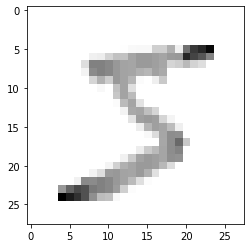

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [2]:
[match_stack,results]=cric_read(['ntb','ipl','cpl','bbl','psl','t20s'],download=True) #get match_stack

  0%|          | 0/6 [00:00<?, ?it/s]

In [55]:
league_list=['ntb','ipl','cpl','bbl','psl','t20s']
def get_match_data(leagues=league_list,hist_data_length=2,form=30,test_size=0.25,download=False):
    
    [match_stack,results]=cric_read(leagues,download) #get match_stack
    
    match_data=cric_wrangle(match_stack,results,hist_data_length) #wrangle match_stack
    
    return train_test_split(match_data,match_data['set_team_win'],test_size=test_size,shuffle=False)

def get_features(metrics,train_data,test_data):
    
    return train_data[metrics],test_data[metrics]

#------------------------------get match data----------------------------
train_data,test_data,Y_train,Y_test=get_match_data(leagues=['ipl'],hist_data_length=5,form=30,test_size=0.33)

/Users/caio/Documents/Python/Cricket/bumrah/bumrah_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


  0%|          | 0/848 [00:00<?, ?it/s]

In [56]:
metric_list=['rel_bat_avg','rel_bat_sr']+['bowl_avg','bowl_sr','rel_economy']
metric_list=['rel_bat_sr']+['rel_economy']
metric_list+=[metric+'_form' for metric in metric_list]
metric_list
def get_features(metrics,train_data,test_data):
    
    return train_data[metrics],test_data[metrics],
#------------------------------get features------------------------------
x_train,x_test=get_features(['set_team_toss','1_in_wickets']+metric_list,train_data,test_data)

In [57]:
y_train=Y_train
y_test=Y_test

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

feats=2*len(metric_list)+2

mlp = MLPClassifier(hidden_layer_sizes=(feats,feats),max_iter=20000)
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

       False       0.63      0.67      0.65        94
        True       0.51      0.46      0.48        69

    accuracy                           0.58       163
   macro avg       0.57      0.57      0.57       163
weighted avg       0.58      0.58      0.58       163



## linear regression

In [60]:
def cric_model(x_train,x_test,y_train,y_test,model_type='logistic'):
    
    model_df=test_data.copy()
    
    if model_type=='logistic':
    
        clf=LogisticRegression(solver='lbfgs')
        
    elif model_type=='forest':   

        clf=RandomForestClassifier(max_depth=5)
        
    elif model_type=='gbt':   

        clf=xgb.XGBClassifier(use_label_encoder=False)
        clf.fit(x_train,np.ravel(y_train))
        xgb.plot_importance(clf,importance_type='weight')
        plt.show()
    
    clf.fit(x_train,np.ravel(y_train))    
    predictions=clf.predict(x_test)
    correct_predictions=model_df['set_team_win']==predictions
    print(sum(correct_predictions)/len(correct_predictions))

    model_df['prob_set']=clf.predict_proba(x_test)[:,1]
    model_df['prob_chase']=clf.predict_proba(x_test)[:,0]
    
    return model_df,clf

[model_df,clf]=cric_model(x_train,x_test,y_train,y_test,model_type='logistic')
model_df

0.6073619631901841


,match_id,date,set_team,chase_team,set_team_win,set_team_toss,1_in_wickets,1w_score,bat_avg,bat_avg_form,...,bowl_avg,bowl_avg_form,economy,economy_form,bowl_sr,bowl_sr_form,rel_economy,rel_economy_form,prob_set,prob_chase
681,1136584,2018-04-25,Royal Challengers Bangalore,Chennai Super Kings,False,False,8,213,4.770312,-1.075758,...,1.134439,3.746552,0.355606,0.208696,-0.029082,2.079310,0.032485,-0.042160,0.327328,0.672672
682,1136585,2018-04-26,Sunrisers Hyderabad,Kings XI Punjab,True,False,6,353,2.655852,-7.057110,...,-1.735874,-8.845926,0.123913,-0.918272,-1.698689,-4.597037,-0.006670,-0.018124,0.474467,0.525533
683,1136586,2018-04-27,Delhi Daredevils,Kolkata Knight Riders,True,False,4,150,-1.862298,-7.174725,...,6.645496,-3.797619,0.443548,-0.445104,3.849754,-1.761905,0.040577,0.014839,0.581597,0.418403
684,1136587,2018-04-28,Chennai Super Kings,Mumbai Indians,False,False,5,180,1.602416,15.515385,...,-2.566312,7.829094,-0.125891,1.214211,-1.591483,3.268680,-0.022688,0.031048,0.485449,0.514551
685,1136588,2018-04-29,Sunrisers Hyderabad,Rajasthan Royals,True,True,7,214,2.467875,-0.085995,...,-0.758095,-30.242857,-0.364935,-2.402958,0.335238,-15.602381,0.004550,0.059993,0.350924,0.649076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1254089,2021-10-02,Chennai Super Kings,Rajasthan Royals,False,False,4,202,5.359332,0.922807,...,0.140765,0.876623,0.208024,0.169753,-0.479146,0.194805,-0.020477,-0.033567,0.550438,0.449562
844,1254112,2021-10-02,Mumbai Indians,Delhi Capitals,False,False,8,347,-1.549120,-1.637500,...,-0.322356,6.901316,-0.040799,1.802973,-0.144157,1.332237,0.019416,-0.136617,0.326432,0.673568
845,1254090,2021-10-03,Royal Challengers Bangalore,Punjab Kings,True,True,7,190,-2.556242,-11.238095,...,-4.333824,0.708333,-0.317014,0.392526,-2.443315,-0.166667,0.004445,-0.036892,0.337086,0.662914
846,1254109,2021-10-03,Sunrisers Hyderabad,Kolkata Knight Riders,False,True,8,436,-1.448526,-5.918660,...,-8.839840,4.333333,-0.451689,0.398727,-5.661364,2.500000,0.000424,-0.098154,0.290682,0.709318


In [42]:
print(classification_report(model_df['set_team_win'],model_df['prob_set']>0.5))

              precision    recall  f1-score   support

       False       0.64      0.73      0.68        22
        True       0.65      0.55      0.59        20

    accuracy                           0.64        42
   macro avg       0.64      0.64      0.64        42
weighted avg       0.64      0.64      0.64        42



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.624


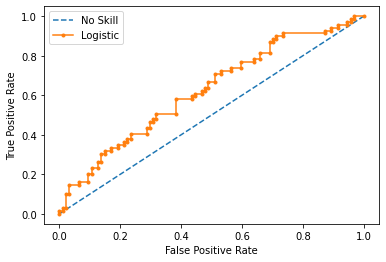

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(model_df['set_team_win']))]
# keep probabilities for the positive outcome only
lr_probs = model_df['prob_set']
# calculate scores
ns_auc = roc_auc_score(model_df['set_team_win'], ns_probs)
lr_auc = roc_auc_score(model_df['set_team_win'], lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(model_df['set_team_win'], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(model_df['set_team_win'], lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
match_stack[match_stack['striker'].str.find('Jaiswal')>-1]['striker']


[match_stack,results]=cric_read(['ntb','ipl','cpl','psl','t20s'])

match_stack=match_stack[match_stack['start_date']>np.datetime64('2019-10-05')]

mi=['RG Sharma','Ishan Kishan','SA Yadav','SS Tiwary','KA Pollard','HH Pandya', 'JDS Neesham','J Yadav',
   'NM Coulter-Nile','JJ Bumrah','TA Boult']
rr=['E Lewis','YBK Jaiswal','SV Samson','S Dube','GD Phillips','DA Miller','R Tewatia','S Gopal',
   'Kuldip Yadav','Mustafizur Rahman','C Sakariya']
game_today=get_metrics(match_stack,rr,aggregate=True)-get_metrics(match_stack,mi,aggregate=True)
game_today.drop(['bat_sr','bat_avg','economy'],axis=1,inplace=True)
game_today.insert(0,'1_in_wickets',9)
game_today.insert(0,'set_team_toss',False)

In [ ]:
'''backtest(examine_df,betfair_data)clf_tree=DecisionTreeClassifier(random_state=0)
clf_tree.fit(x_train,np.ravel(y_train))

clf_forest=RandomForestClassifier(max_depth=5)
clf_forest.fit(x_train,np.ravel(y_train))

clf_gbt=xgb.XGBClassifier(use_label_encoder=False).fit(x_train,np.ravel(y_train))'''

In [ ]:
'''data=test.drop('match_id',axis=1)
plt.scatter(data['bat_avg'],data['set_team_win'])
plt.show()

x=data.drop('set_team_win',axis=1)
y=data['set_team_win']

clf_logistic=LogisticRegression(solver='lbfgs')
clf_logistic.fit(x,np.ravel(y))

print(clf_logistic.get_params())

print(clf_logistic.intercept_)

data.corr()['set_team_win']'''

In [ ]:
'''clf_gbt=xgb.XGBClassifier().fit(x_train,np.ravel(y_train))
xgb.plot_importance(clf,importance_type='weight')
plt.show()'''